### GROUP 45 PROJECT

### PROJECT AIM
The main aim of this project is to build a model that can predict whether a patient has a Cardiovascular disease of not. This will help in the early detection of the disease and assit in preventing unforseen circumstances that can arrive due to complacency.

###  Overview of the dataset
__age__: The person’s age in years <br>
__sex__: The person’s sex (1 = male, 0 = female) <br>
__cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>
__trestbps__: The person’s resting blood pressure (mm Hg on admission to the hospital) <br>
__chol__: The person’s cholesterol measurement in mg/dl <br>
__fbs__: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) <br>
__restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria) <br>
__thalach__: The person’s maximum heart rate achieved <br>
__exang__: Exercise-induced angina (1 = yes; 0 = no) <br>
__oldpeak__: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here) <br>
__slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) <br>
__ca__: The number of major vessels (0–3) <br>
__thal__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) <br>
__target__: Heart disease (0 = no, 1 = yes) <br>

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [6]:
import numpy as np

In [5]:
import numpy as np

In [8]:
##IMPORTING OUR DATA

In [58]:
df = pd.read_csv('Heart_data.csv')

In [51]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1330,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
43,59.0,1.0,3.0,150.0,212.0,1.0,0.0,157.0,0.0,1.6,1.0,0.0,3.0,0
865,54.0,0.0,2.0,160.0,201.0,0.0,1.0,163.0,0.0,0.0,2.0,1.0,2.0,1
716,65.0,0.0,2.0,160.0,360.0,0.0,0.0,151.0,0.0,0.8,2.0,0.0,2.0,1
1310,58.0,1.0,0.0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0,0


### Data Exploration

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1513.000000,1561.00000,1433.000000,1592.000000,1529.000000,1513.000000,1585.000000,1592.000000,1545.000000,1561.000000,1538.000000,1592.000000,1585.000000,1592.000000
mean,54.427627,0.68802,1.731333,131.581658,246.507521,0.147389,0.699685,149.300251,0.333981,1.066496,1.455787,0.725503,3.173502,0.751884
std,9.076772,0.46345,1.463610,17.610804,51.317002,0.354611,0.764196,23.007862,0.471786,1.171509,0.623490,1.000014,1.698798,0.782024
min,29.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.00000,2.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,61.000000,1.00000,3.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1588,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1589,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1590,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df.isna().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [93]:
#Replace the nan values with the mean value of the column
df.fillna(df.mean(), inplace=True)

In [94]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
## Visulaizing the data features to find the correlation between them which will infer the important features.

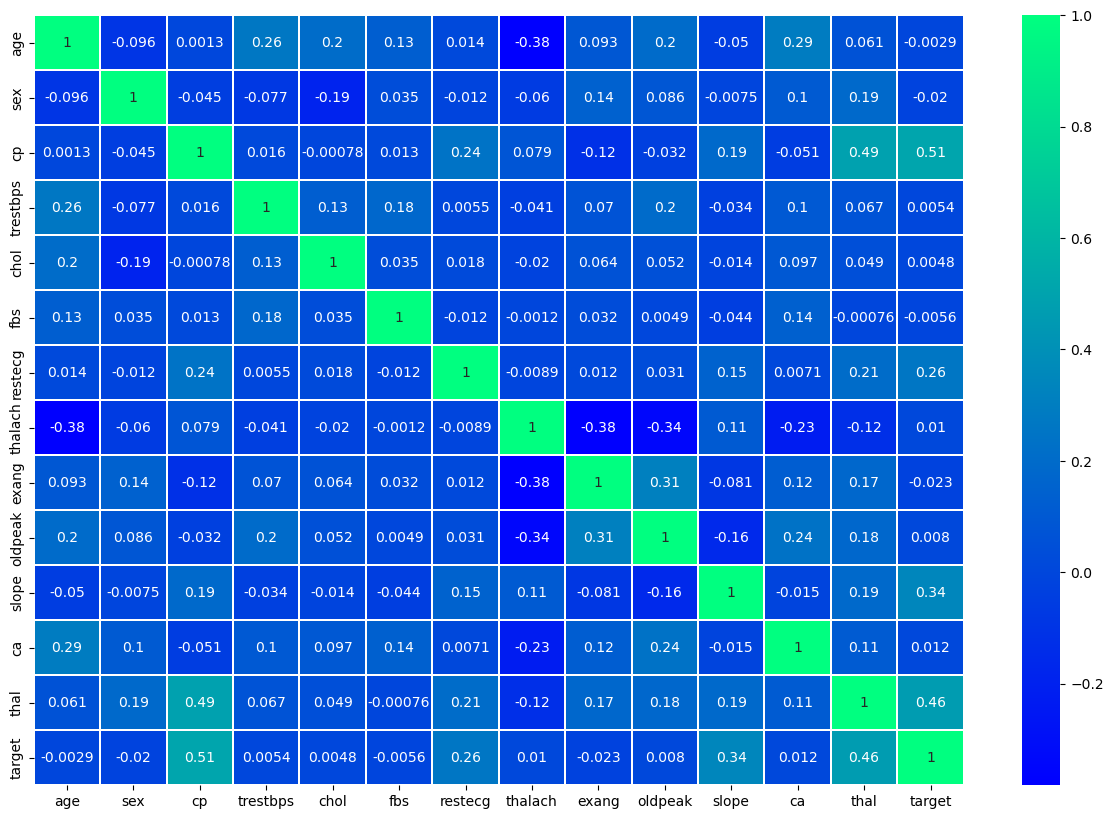

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

In [29]:
## relation between each features distribution with the help of histogram.

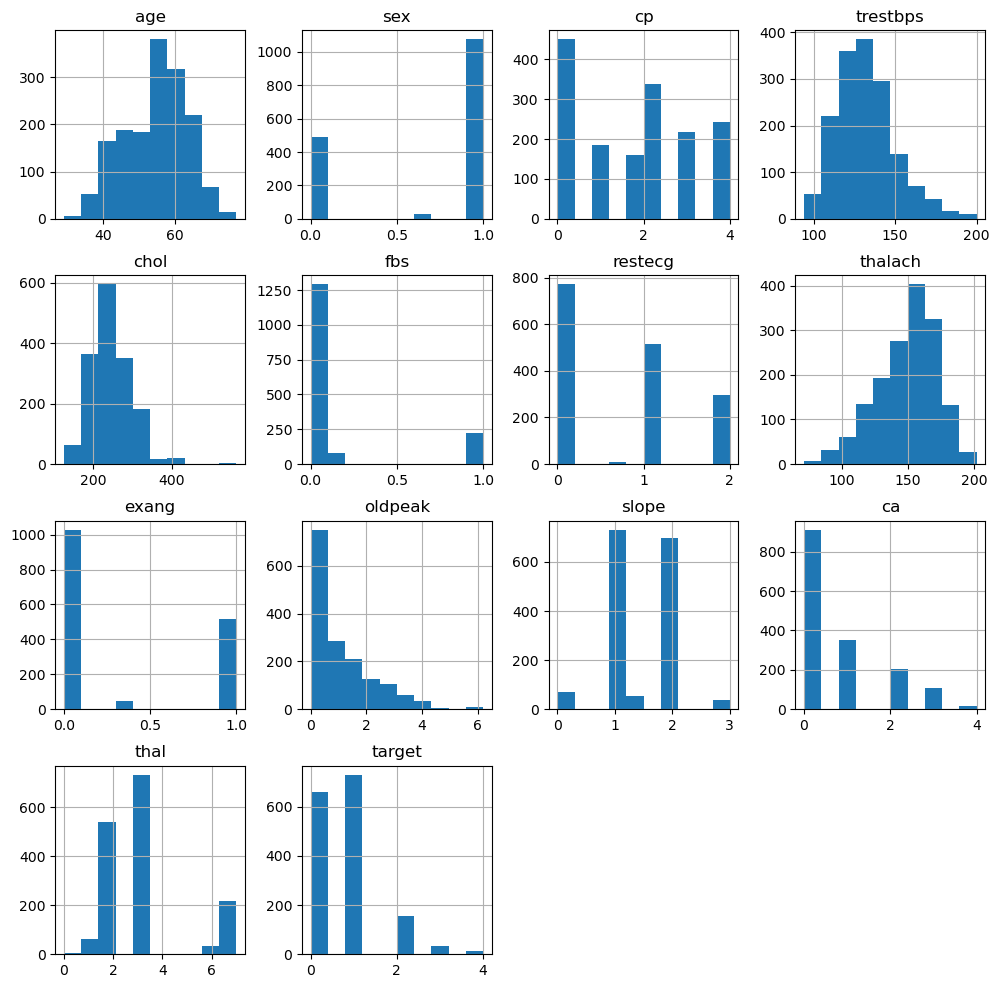

In [30]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

### Feature Engineering

In [95]:
df.target.value_counts()

target
1    730
0    659
2    155
3     35
4     13
Name: count, dtype: int64

In [96]:
#use only rows with target values of 0 and 1 since we are predicing whether the patient has the disease or not which is
#only between 1 and 0
df1= df[df['target'] <2]

In [97]:
df1.target.value_counts()

target
1    730
0    659
Name: count, dtype: int64

In [31]:
#splitting of the data into X and Y


### modelling

In [98]:
# get predictors and the target variable
X = df1.drop(columns=['target'])  
y = df1['target']  

In [100]:
#importing the standant scaler module 
from sklearn.preprocessing import StandardScaler

In [101]:
# importing the train test split module to split the dataset into test and train
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [185]:
## Algorithm implememtation ##(LINEAR REGRESSION)

In [186]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(X_train, y_train)



LinearRegression()

In [187]:
print (reg.score(X_train, y_train))

0.25688525378273297


In [188]:
## FOREST REGRESSOR

In [189]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [190]:
print(forest_reg.score(X_test,y_test))

0.4372174893864803


In [191]:
## DECISION TREE REGRESSOR

In [192]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [193]:
print (DTR.score(X_train, y_train))

0.9134978450741829


In [194]:
##DECISION TREE CLASSIFIER

In [195]:
from sklearn.tree import DecisionTreeClassifier
DTF = DecisionTreeClassifier()
DTF.fit(X_train, y_train)

DecisionTreeClassifier()

In [196]:
print (DTF.score(X_train, y_train))

0.9567901234567902


In [197]:
##RandomForestClassifier

In [198]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [199]:
print (RFC.score(X_train, y_train))

0.9567901234567902


In [164]:
#hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(RFC, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000222D7D22410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000222D7DB5B10>})

In [165]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 472}


In [200]:
RFC2 = RandomForestClassifier(max_depth= 18, n_estimators= 472)
RFC2.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=472)

In [201]:
print (RFC2.score(X_train, y_train))

0.9567901234567902


In [71]:
## LogisticRegression

In [84]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()

In [85]:
log_reg.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
print (log_reg.score(X_train, y_train))

0.757396449704142


In [74]:
## Final Model Implementation
## applying the best working algorithm (i.e., ## DECISION TREE REGRESSOR) into our model and check whether our model will result in the correct output or not with the help of available data.

#### <font color='blue'>The two top performing models are the Decision Tree and the Random forest model </font>

#### standardization

In [139]:
 # Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [140]:
DTR_std = DecisionTreeRegressor()
DTR_std.fit(X_train_std, y_train)

DecisionTreeRegressor()

In [141]:
print (DTR_std.score(X_train_std, y_train))

0.9134978450741829


In [90]:
# one more test on another model

In [142]:
DTF_std = DecisionTreeClassifier()
DTF_std.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [143]:
print (DTF_std.score(X_train_std, y_train))

0.9567901234567902


No difference between the standardized and the unstanderdized

### Testing on unseen data

In [144]:
#lets test the model on unseen data
y_pred = RFC2.predict(X_test) #generate predictions
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy for Random forest is: {:.2f}%".format(accuracy_DTF * 100))

Accuracy for Random forest is: 79.62%


### Result simulation

In [145]:
input=(63,3,145,233,150,2.3,23,45,27,98,21,11,12)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=RFC2.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [146]:
input=(0.29,0.14,0.51,0.26,0.13,0.18,0.24,0.11,0.31,0.31,0.31,0.34,0.29)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=RFC2.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [147]:
input=(1,1,1,1,1,1,1,1,1,1,1,1,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=RFC2.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
